In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
print(df)

        ID  Oxygen  PulseRate  Temperature   Result
0        0      98         65           95   Stabil
1        1      96         92           95   Stabil
2        2      95         92           99   Stabil
3        3      97         56           96   Stabil
4        4      88         94           98  Darurat
...    ...     ...        ...          ...      ...
9995  9995      95        124           97   Stabil
9996  9996      88         70          100  Darurat
9997  9997      99         56          105   Stabil
9998  9998      92         49           98  Darurat
9999  9999      85         52           99  Darurat

[10000 rows x 5 columns]


In [ ]:
df.drop('Temperature', inplace=True, axis=1)

In [ ]:
df.head()

,ID,Oxygen,PulseRate,Result
0,0,98,65,Stabil
1,1,96,92,Stabil
2,2,95,92,Stabil
3,3,97,56,Stabil
4,4,88,94,Darurat


In [ ]:
df.shape

(10000, 4)

In [ ]:
df.set_index('ID',inplace=True)

In [ ]:
df.tail()

,Oxygen,PulseRate,Result
ID,,,
9995,95,124,Stabil
9996,88,70,Darurat
9997,99,56,Stabil
9998,92,49,Darurat
9999,85,52,Darurat


In [ ]:
df.isna().sum()

Oxygen       0
PulseRate    0
Result       0
dtype: int64

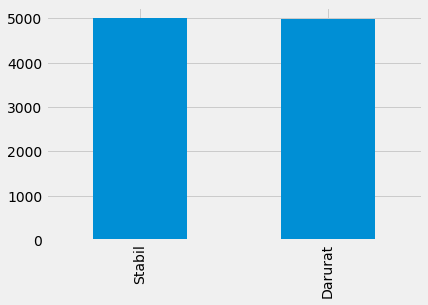

In [ ]:
plt.style.use('fivethirtyeight')
df['Result'].value_counts().plot(kind='bar')
plt.show()

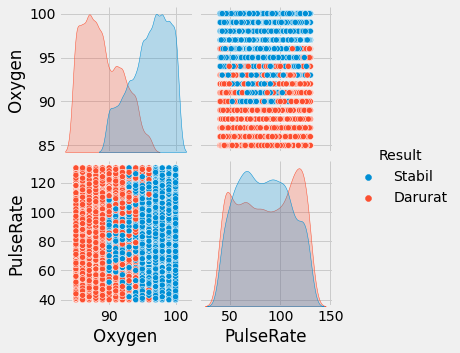

In [ ]:
plt.style.use('fivethirtyeight')
sns.pairplot(data=df,hue='Result')
plt.show()

In [ ]:
df['Result'].replace(['Darurat','Stabil'],[1,0],inplace=True)

In [ ]:
df['Result'].unique()

array([0, 1])

In [ ]:
x = df.drop('Result',axis=1)
y = df['Result']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
x_train.shape

(7000, 2)

In [ ]:
x_test.shape

(3000, 2)

In [ ]:
y_train.shape

(7000,)

In [ ]:
y_test.shape

(3000,)

In [ ]:
#We choose kernel='rbf'
model = SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
model.score(x_test,y_test)

0.864

In [ ]:
model.score(x_train,y_train)

0.8618571428571429

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
y_pred_train = model.predict(x_train)

In [ ]:
test = confusion_matrix(y_pred,y_test)

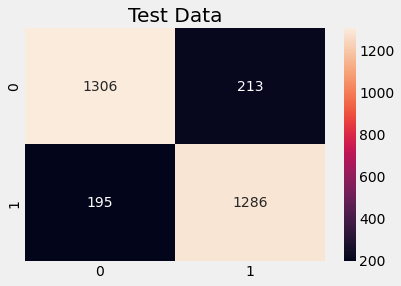

In [ ]:
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

In [ ]:
train = confusion_matrix(y_pred_train,y_train)

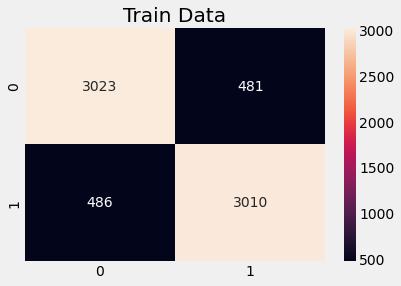

In [ ]:
plt.title('Train Data')
sns.heatmap(data=train,annot=True,fmt='g')
plt.show()

In [ ]:
model2 = SVC(C=5,gamma='auto')
model2.fit(x_train,y_train)

SVC(C=5, gamma='auto')

In [ ]:
print('Test Accuracy:',model2.score(x_test,y_test))
print('Train Accuracy:',model2.score(x_train,y_train))

Test Accuracy: 0.8686666666666667
Train Accuracy: 0.905


In [ ]:
y_pred_train2 = model2.predict(x_train)
y_pred2 = model2.predict(x_test)

In [ ]:
test2 = confusion_matrix(y_pred2,y_test)

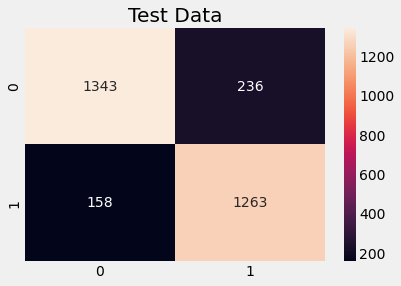

In [ ]:
plt.title('Test Data')
sns.heatmap(data=test2,annot=True,fmt='g')
plt.show()

In [ ]:
train2 = confusion_matrix(y_pred_train2,y_train)

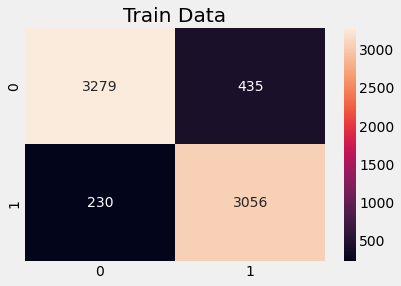

In [ ]:
plt.title('Train Data')
sns.heatmap(data=train2,annot=True,fmt='g')
plt.show()